In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

#Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("darkgrid")

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import collections


from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from scipy.stats import norm
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
pd.set_option("display.max_columns", 999)
pd.get_option("display.max_columns")

pd.set_option("display.max_rows", 999)
pd.get_option("display.max_rows")

%matplotlib inline

Using TensorFlow backend.


In [2]:
application_score = pd.read_csv("Scores/application_score_US.csv")
behavioral_score = pd.read_csv("Scores/behavioral_score_US.csv")
bureau_score = pd.read_csv("Scores/bureau_score_US.csv")

In [3]:
#application_score = application_score.drop("Unnamed: 0",axis=1)
application_score.head()

SK_ID_CURR  DEFAULT_SCORE  TARGET
0      100002       0.691744       1
1      100003       0.629053       0
2      100004       0.710206       0
3      100006       0.703636       0
4      100007       0.648303       0

In [4]:
behavioral_score.head()

SK_ID_CURR  DEFAULT_SCORE  TARGET
0    100002.0       0.600092     1.0
1    100003.0       0.600092     0.0
2    100004.0       0.500589     0.0
3    100006.0       0.600092     0.0
4    100007.0       0.600092     0.0

In [5]:
bureau_score.head()

SK_ID_CURR  DEFAULT_SCORE  TARGET
0    100002.0       0.350626     1.0
1    100003.0       0.411705     0.0
2    100004.0       0.428775     0.0
3    100007.0       0.428775     0.0
4    100008.0       0.368934     0.0

In [6]:
application_score.shape

(307511, 3)

In [7]:
behavioral_score.shape

(307511, 3)

In [8]:
bureau_score.shape

(263491, 3)

In [9]:
# Merge the data

app_behav_score= pd.merge(application_score,behavioral_score, left_on= ["SK_ID_CURR", "TARGET"], 
                         right_on = ["SK_ID_CURR", "TARGET"],suffixes = ("_APPLICATION", "_BEHAVIOURAL") )

In [10]:
app_behav_score.head()

SK_ID_CURR  DEFAULT_SCORE_APPLICATION  TARGET  DEFAULT_SCORE_BEHAVIOURAL
0      100002                   0.691744       1                   0.600092
1      100003                   0.629053       0                   0.600092
2      100004                   0.710206       0                   0.500589
3      100006                   0.703636       0                   0.600092
4      100007                   0.648303       0                   0.600092

In [11]:
app_behav_bureau_score= pd.merge(app_behav_score,bureau_score, left_on= ["SK_ID_CURR", "TARGET"], 
                         right_on = ["SK_ID_CURR", "TARGET"])

In [12]:
app_behav_bureau_score =app_behav_bureau_score.rename(columns= {"DEFAULT_SCORE":"DEFAULT_SCORE_BUREAU"})

In [16]:
app_behav_bureau_score.head()

SK_ID_CURR  DEFAULT_SCORE_APPLICATION  TARGET  DEFAULT_SCORE_BEHAVIOURAL  \
0      100002                   0.691744       1                   0.600092   
1      100003                   0.629053       0                   0.600092   
2      100004                   0.710206       0                   0.500589   
3      100007                   0.648303       0                   0.600092   
4      100008                   0.665233       0                   0.600092   

   DEFAULT_SCORE_BUREAU  
0              0.350626  
1              0.411705  
2              0.428775  
3              0.428775  
4              0.368934

In [14]:
app_behav_bureau_score.shape

(263491, 5)

In [15]:
# EDA
app_behav_bureau_score.describe(percentiles=[.25, .5, .75, .90, .95, .99])

SK_ID_CURR  DEFAULT_SCORE_APPLICATION         TARGET  \
count  263491.000000              263491.000000  263491.000000   
mean   278119.931079                   0.688170       0.077301   
std    102811.639565                   0.036893       0.267068   
min    100002.000000                   0.346105       0.000000   
25%    189006.500000                   0.673318       0.000000   
50%    277991.000000                   0.695882       0.000000   
75%    367177.500000                   0.710206       0.000000   
90%    420702.000000                   0.726607       0.000000   
95%    438412.500000                   0.736667       1.000000   
99%    452734.100000                   0.754836       1.000000   
max    456255.000000                   0.817260       1.000000   

       DEFAULT_SCORE_BEHAVIOURAL  DEFAULT_SCORE_BUREAU  
count              263491.000000         263491.000000  
mean                    0.578517              0.375309  
std                     0.038226              0.030542  
min                     0.410896              0.294960  
25%                     0.581418              0.366743  
50%                     0.600092              0.368934  
75%                     0.600092              0.393480  
90%                     0.600092              0.428775  
95%                     0.600092              0.428775  
99%                     0.600092              0.428775  
max                     0.712120              0.444894

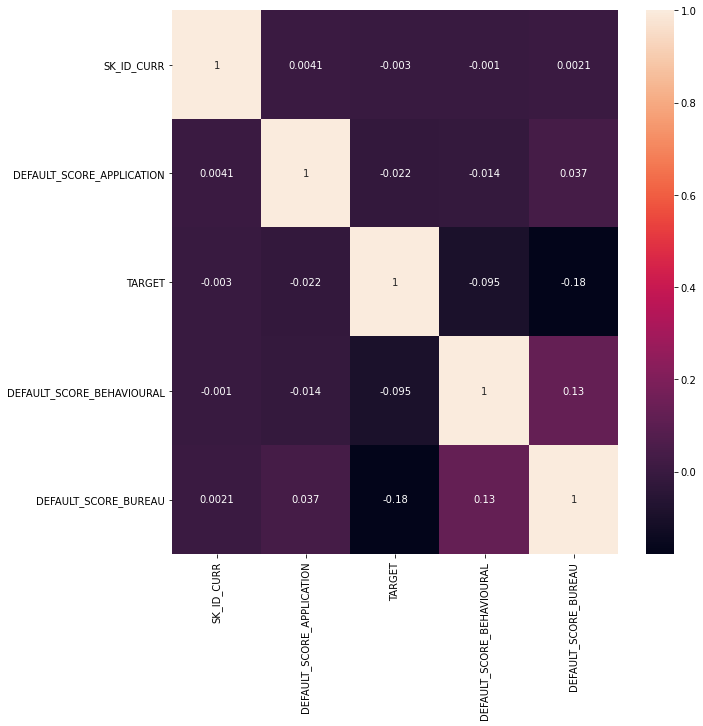

In [17]:
plt.figure(figsize = (10,10))        # Size of the figure
sns.heatmap(app_behav_bureau_score.corr(),annot = True)
plt.show()

(array([1.6000e+01, 1.4000e+01, 4.1000e+01, 1.1700e+02, 2.5390e+03,
        1.7648e+04, 4.1081e+04, 1.5757e+05, 2.9932e+04, 4.1000e+02]),
 array([0.34610462, 0.39322012, 0.44033562, 0.48745111, 0.53456661,
        0.58168211, 0.62879761, 0.67591311, 0.7230286 , 0.7701441 ,
        0.8172596 ]),
 <BarContainer object of 10 artists>)

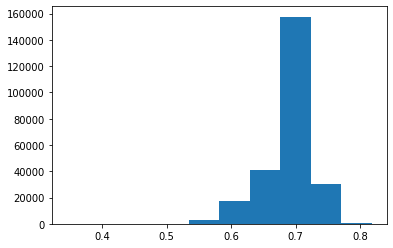

In [18]:
plt.hist(app_behav_bureau_score["DEFAULT_SCORE_APPLICATION"])

(array([ 6043., 33672., 40973., 32925., 31662., 38936., 31556., 23482.,
         8927.,  1192.]),
 array([0.09943712, 0.16612314, 0.23280916, 0.29949519, 0.36618121,
        0.43286723, 0.49955325, 0.56623927, 0.6329253 , 0.69961132,
        0.76629734]),
 <BarContainer object of 10 artists>)

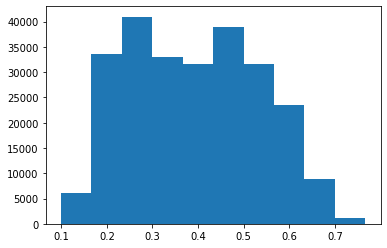

In [19]:
plt.hist(app_behav_bureau_score["DEFAULT_SCORE_BUREAU"])

(array([1.3000e+01, 1.9300e+02, 3.4100e+02, 1.2010e+03, 7.7780e+03,
        2.3048e+04, 6.0921e+04, 9.6548e+04, 5.8946e+04, 3.7900e+02]),
 array([0.14391625, 0.20326113, 0.26260602, 0.32195091, 0.38129579,
        0.44064068, 0.49998556, 0.55933044, 0.61867533, 0.67802021,
        0.7373651 ]),
 <BarContainer object of 10 artists>)

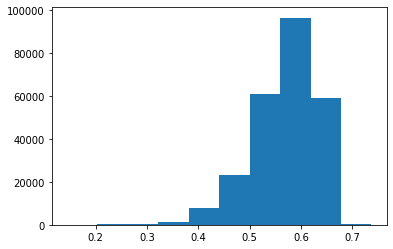

In [20]:
plt.hist(app_behav_bureau_score["DEFAULT_SCORE_BEHAVIOURAL"])
#sns.displot(app_behav_bureau_score, x="DEFAULT_SCORE_BEHAVIOURAL")

In [21]:
X = app_behav_bureau_score.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = app_behav_bureau_score['TARGET']

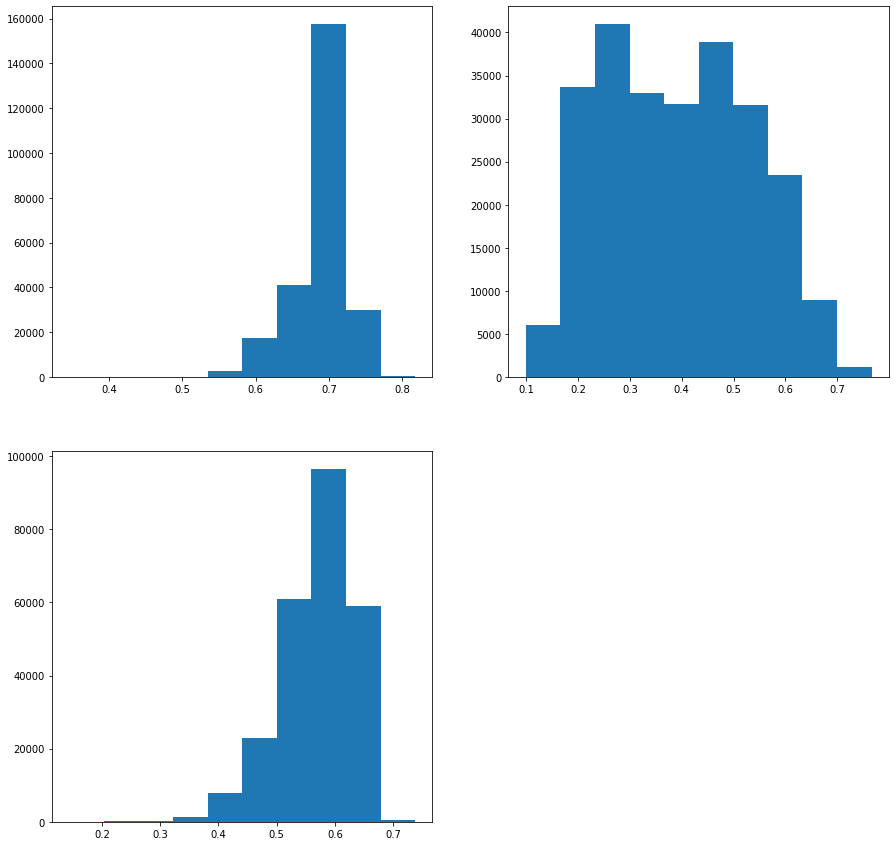

In [22]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.hist(X["DEFAULT_SCORE_APPLICATION"])
plt.subplot(2,2,2)
plt.hist(X["DEFAULT_SCORE_BUREAU"])

plt.subplot(2,2,3)
plt.hist(X["DEFAULT_SCORE_BEHAVIOURAL"])

plt.show()


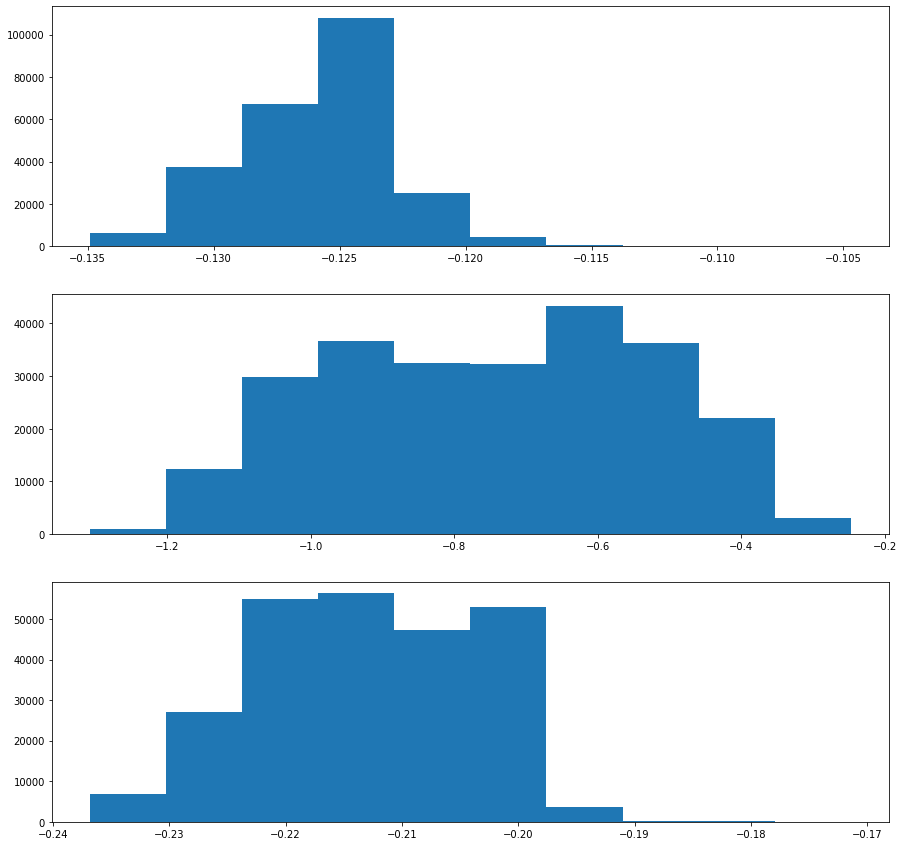

In [23]:
from scipy.stats import boxcox
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
X["DEFAULT_SCORE_APPLICATION"] = boxcox(X["DEFAULT_SCORE_APPLICATION"])[0]
plt.hist(X["DEFAULT_SCORE_APPLICATION"])
plt.subplot(3,1,2)
X["DEFAULT_SCORE_BUREAU"] = boxcox(X["DEFAULT_SCORE_BUREAU"])[0]
plt.hist(X["DEFAULT_SCORE_BUREAU"])
plt.subplot(3,1,3)
X["DEFAULT_SCORE_BEHAVIOURAL"] = boxcox(X["DEFAULT_SCORE_BEHAVIOURAL"])[0]
plt.hist(X["DEFAULT_SCORE_BEHAVIOURAL"])


plt.show()

In [24]:
#Split the data using train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [25]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = X_train_stand.columns

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler()
    
    # transform the training data column
    X_train_stand[i] = scale.fit_transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [26]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train_stand.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 

Before OverSampling, the shape of train_X: (149620, 3)
Before OverSampling, the shape of train_y: (149620,) 

Before OverSampling, counts of label '1': 11843
Before OverSampling, counts of label '0': 137777


In [27]:
# SMOTE OVERSAMPLING
sm = SMOTE(random_state = 2) 
X_train_SMOTE, y_train_SMOTE = sm.fit_sample(X_train_stand, y_train.ravel()) 

In [28]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_SMOTE.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_SMOTE.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_SMOTE == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_SMOTE == 0))) 

After OverSampling, the shape of train_X: (275554, 3)
After OverSampling, the shape of train_y: (275554,) 

After OverSampling, counts of label '1': 137777
After OverSampling, counts of label '0': 137777


In [31]:
#Convert to arrays to feed to the classifications algorithms
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000,n_jobs=-1),
    "Support Vector Classifier": LinearSVC(dual=False, random_state=0),
    "Decision Tree": DecisionTreeClassifier(max_depth = 5),
    "RandomForest":RandomForestClassifier(max_depth = 6, n_jobs=-1),
    "Gradient Boosting":XGBClassifier(objective='binary:logistic',max_depth =3, n_estimators=10, eval_metric='logloss', seed=123, n_jobs=-1,verbosity=3)
}

In [32]:
#Calculate the cross-validation score for each classifier 8;24
print('Cross-Validation Scores:-')
for key, classifier in classifiers.items():
        classifier.fit(X_train_SMOTE, y_train_SMOTE)
        cv_score = cross_val_score(classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='accuracy',n_jobs=-1)
        precision = cross_val_score(classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='precision',n_jobs=-1)
        recall = cross_val_score(classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='recall',n_jobs=-1)
        auc = cross_val_score(classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='roc_auc',n_jobs=-1)
        print('{}: {} : {} : {} : {}'.format(key,round(cv_score.mean()*100.0, 2),
                                     round(recall.mean()*100.0, 2),
                                     round(precision.mean()*100.0, 2),
                                     round(auc.mean()*100.0, 2),))
    

Cross-Validation Scores:-
Logistic Regression: 64.87 : 66.5 : 64.4 : 70.66
Support Vector Classifier: 64.81 : 66.69 : 64.27 : 70.67
Decision Tree: 66.3 : 64.11 : 67.44 : 71.9
RandomForest: 68.34 : 66.1 : 68.94 : 75.2
[19:44:55] DEBUG: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/gbm/gbtree.cc:154: Using tree method: 2
[19:44:55] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:44:55] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:44:55] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:55] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:44:55] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:44:55] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:44:55] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:44:56] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:44:56] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/upda

In [33]:
 params = {
    "Logistic Regression": {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    "Support Vector Classifier": {'C': [0.5, 0.7, 0.9, 1]},
    "Decision Tree": {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))},
     "RandomForest": {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))},
     "Gradient Boosting":{
     "eta"    : [0.05, 0.10, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5],
     "gamma"            : [ 0.1, 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.5 , 0.7 ]
     }

}

In [34]:
#Using Grid search for finding the most optimal hyperparameters
def randomsearch(classifier, params):
    k = StratifiedKFold(n_splits=10)
    grid_classifier = RandomizedSearchCV(classifier, params, cv = k, n_jobs=-1)
    grid_classifier.fit(X_train_SMOTE, y_train_SMOTE)
    best_classifier = grid_classifier.best_estimator_
    return best_classifier

In [35]:
#Using Grid search for finding the most optimal hyperparameters
def gridsearch(classifier, params):
    grid_classifier = GridSearchCV(classifier, params,n_jobs=-1)
    grid_classifier.fit(X_train_SMOTE, y_train_SMOTE)
    best_classifier = grid_classifier.best_estimator_
    return best_classifier

In [36]:
#Scores after applying Grid Search
hyperparameter_tuned_classfier = dict()
print('Cross-Validation Scores after applying RandomSearch:-')
for key, classifier in classifiers.items():
    tuned_classifier = randomsearch(classifier,params[key])
    hyperparameter_tuned_classfier[key] =tuned_classifier
    cv_score = cross_val_score(tuned_classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='accuracy',n_jobs=-1)
    precision = cross_val_score(tuned_classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='precision',n_jobs=-1)
    recall = cross_val_score(tuned_classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='recall',n_jobs=-1)
    auc = cross_val_score(tuned_classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='roc_auc',n_jobs=-1)
    print('{}: {} : {} : {} : {}'.format(key,round(cv_score.mean()*100.0, 2),
                                     round(recall.mean()*100.0, 2),
                                     round(precision.mean()*100.0, 2),
                                     round(auc.mean()*100.0, 2),))

Cross-Validation Scores after applying RandomSearch:-
Logistic Regression: 64.86 : 66.5 : 64.39 : 70.66


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Support Vector Classifier: 64.82 : 66.68 : 64.29 : 70.67


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Decision Tree: 65.52 : 66.58 : 65.2 : 70.08


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomForest: 65.97 : 60.53 : 67.87 : 71.95


/mnt/disks/user/anaconda3/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:53:20] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 50 extra nodes, 2 pruned nodes, max_depth=5
[19:53:20] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[19:53:20] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=5
[19:53:20] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=5
[19:53:20] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=5
[19:53:20] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/upda

In [37]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    #plt.figure()
    plt.title(title)
    if ylim is not None:
        ax.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


<module 'matplotlib.pyplot' from '/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

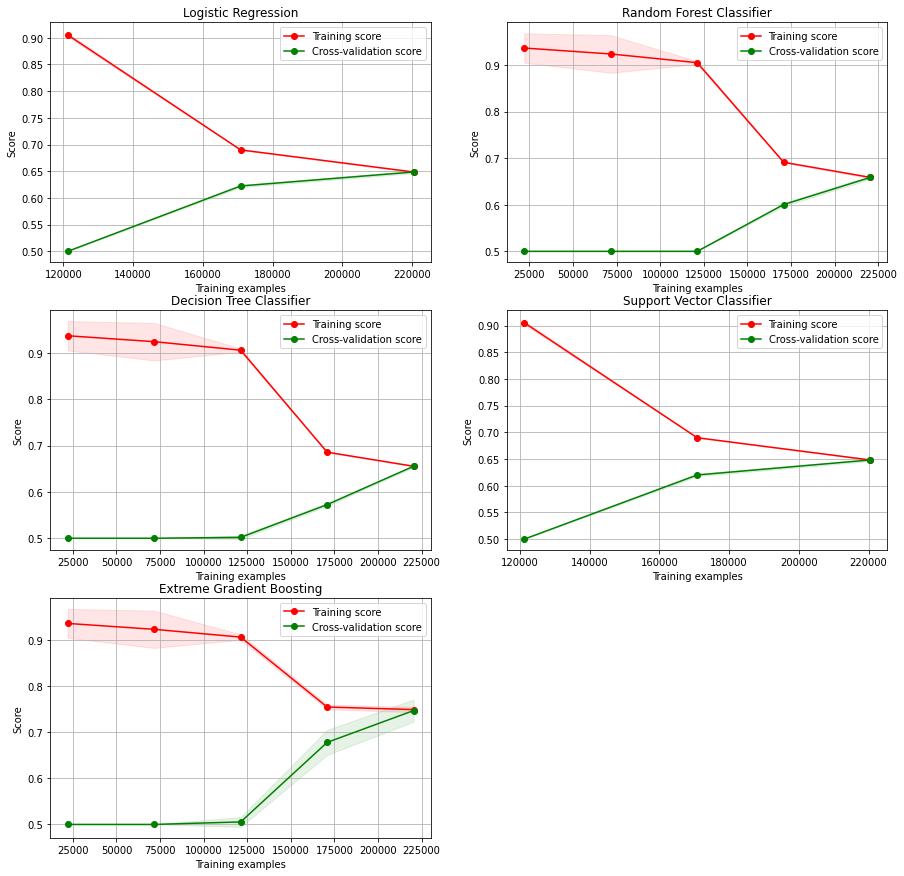

In [38]:
#Variables
n_jobs = 10
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

#Classifiers
log_reg = hyperparameter_tuned_classfier["Logistic Regression"]
svc = hyperparameter_tuned_classfier["Support Vector Classifier"]
decision_tree = hyperparameter_tuned_classfier["Decision Tree"]
RandomForest = hyperparameter_tuned_classfier["RandomForest"]
xgboost = hyperparameter_tuned_classfier["Gradient Boosting"]

#log_reg = randomsearch(LogisticRegression(), params['Logistic Regression'])
#svc = randomsearch(LinearSVC(), params['Support Vector Classifier'])
#decision_tree = randomsearch(DecisionTreeClassifier(), params['Decision Tree'])
#RandomForest = randomsearch(RandomForestClassifier(), params['RandomForest'])
#xgboost = randomsearch(XGBClassifier(), params['Gradient Boosting'])

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plot_learning_curve(log_reg, 'Logistic Regression', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

plt.subplot(3,2,2)
plot_learning_curve(RandomForest, 'Random Forest Classifier', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

plt.subplot(3,2,3)
plot_learning_curve(decision_tree, 'Decision Tree Classifier', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

plt.subplot(3,2,4)
plot_learning_curve(svc, 'Support Vector Classifier', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

plt.subplot(3,2,5)
plot_learning_curve(xgboost, 'Extreme Gradient Boosting', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

#plt.show()

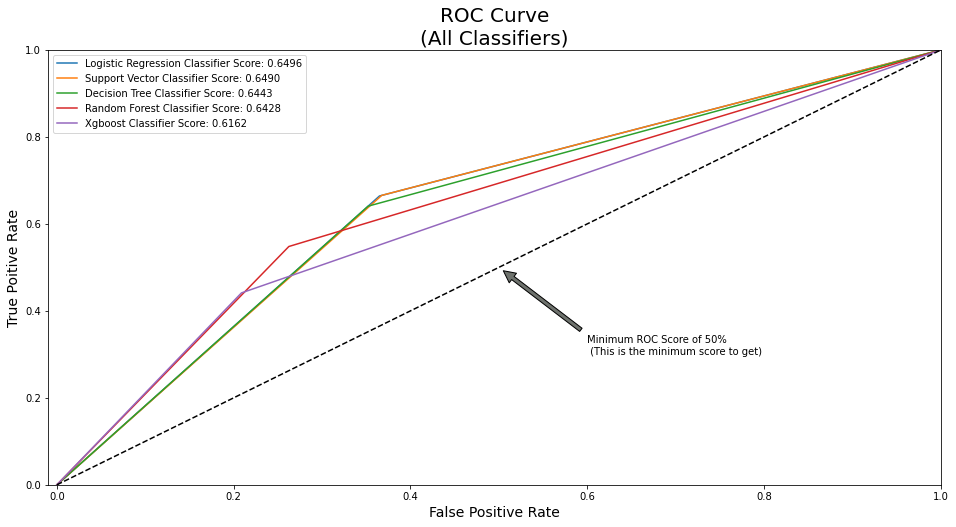

In [39]:
#ROC Curve
'''log_pred = cross_val_predict(log_reg, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5)
tree_pred = cross_val_predict(decision_tree, X_train, y_train, cv=5)
knear_pred = cross_val_predict(knearest, X_train, y_train, cv=5)'''

log_pred = log_reg.predict(X_test_stand)
svc_pred = svc.predict(X_test_stand)
tree_pred = decision_tree.predict(X_test_stand)
RandomForeest_pred = RandomForest.predict(X_test_stand)
Xgboost_pred = xgboost.predict(X_test_stand)

log_fpr, log_tpr, log_threshold = roc_curve(y_test, log_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred)
RF_fpr, RF_tpr, RF_threshold = roc_curve(y_test, RandomForeest_pred)
xgboost_fpr, xgboost_tpr, xgboost_threshold = roc_curve(y_test, Xgboost_pred)

plt.figure(figsize=(16,8))
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_pred)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred)))
plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, tree_pred)))

plt.plot(RF_fpr, RF_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, RandomForeest_pred)))
plt.plot(xgboost_fpr, xgboost_tpr, label='Xgboost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, Xgboost_pred)))

plt.plot([0,1],[0,1],'k--')
plt.axis([-0.01, 1, 0, 1])

plt.title('ROC Curve\n(All Classifiers)', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Poitive Rate', fontsize=14)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.legend()
plt.show()

In [40]:
labels = ['Non-Default', 'Default']

print('Logistic Regression:')
print(classification_report(y_test, log_pred, target_names=labels))

print('Support Vector Classifier:')
print(classification_report(y_test, svc_pred, target_names=labels))

print('Decision Tree:')
print(classification_report(y_test, tree_pred, target_names=labels))

print('Random Forest Classifier:')
print(classification_report(y_test, RandomForeest_pred, target_names=labels))

print('Extreme Gradient Boosting Classifier:')
print(classification_report(y_test, Xgboost_pred, target_names=labels))

Logistic Regression:
              precision    recall  f1-score   support

 Non-Default       0.96      0.64      0.76     92034
     Default       0.13      0.66      0.22      7714

    accuracy                           0.64     99748
   macro avg       0.54      0.65      0.49     99748
weighted avg       0.89      0.64      0.72     99748

Support Vector Classifier:
              precision    recall  f1-score   support

 Non-Default       0.96      0.63      0.76     92034
     Default       0.13      0.67      0.22      7714

    accuracy                           0.64     99748
   macro avg       0.54      0.65      0.49     99748
weighted avg       0.89      0.64      0.72     99748

Decision Tree:
              precision    recall  f1-score   support

 Non-Default       0.96      0.65      0.77     92034
     Default       0.13      0.64      0.22      7714

    accuracy                           0.65     99748
   macro avg       0.54      0.64      0.50     99748
weighted av

In [41]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[58451 33583]
 [ 2591  5123]]
Confusion matrix, without normalization
[[58210 33824]
 [ 2580  5134]]
Confusion matrix, without normalization
[[59623 32411]
 [ 2771  4943]]
Confusion matrix, without normalization
[[67886 24148]
 [ 3487  4227]]
Confusion matrix, without normalization
[[72819 19215]
 [ 4310  3404]]
Confusion matrix, without normalization
[[92034     0]
 [    0  7714]]


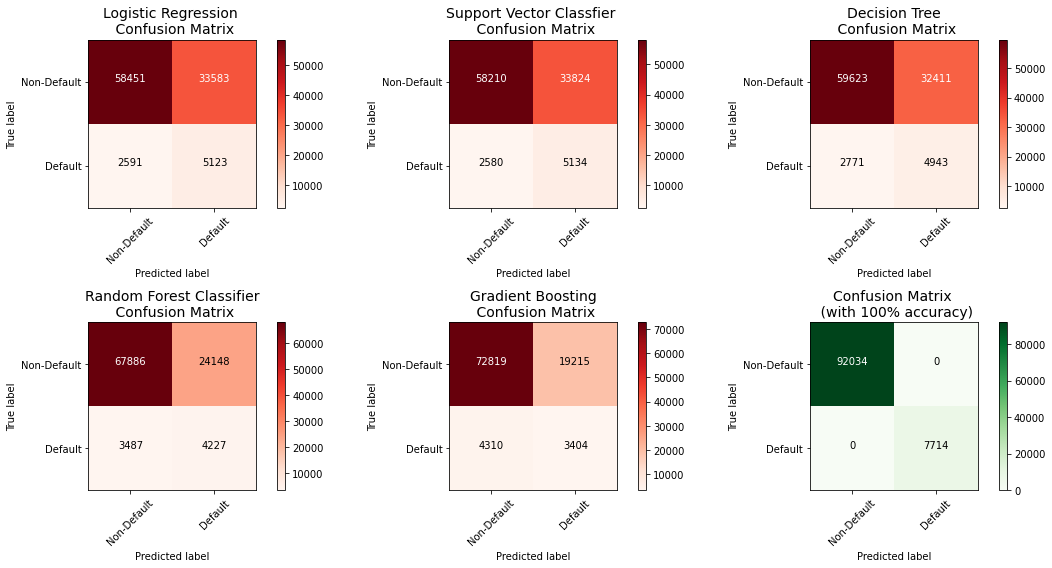

In [42]:
from sklearn.metrics import confusion_matrix
log_reg_cm = confusion_matrix(y_test, log_reg.predict(X_test_stand))
svc_cm = confusion_matrix(y_test, svc.predict(X_test_stand))
dt_cm = confusion_matrix(y_test, decision_tree.predict(X_test_stand))
RF_cm = confusion_matrix(y_test, RandomForest.predict(X_test_stand))
xgboost_cm = confusion_matrix(y_test, xgboost.predict(X_test_stand))

actual_cm = confusion_matrix(y_test, y_test)
labels = ['Non-Default', 'Default']


fig = plt.figure(figsize=(16,8))

fig.add_subplot(231)
plot_confusion_matrix(log_reg_cm, labels, title="Logistic Regression \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(232)
plot_confusion_matrix(svc_cm, labels, title="Support Vector Classfier \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(233)
plot_confusion_matrix(dt_cm, labels, title="Decision Tree\n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(234)
plot_confusion_matrix(RF_cm, labels, title="Random Forest Classifier\n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(235)
plot_confusion_matrix(xgboost_cm, labels, title="Gradient Boosting\n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(236)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

plt.show()

Logistic - Regression Feature: 0, Score: -0.06349
Logistic - Regression Feature: 1, Score: -0.25664
Logistic - Regression Feature: 2, Score: -0.68223
[-0.02745356 -0.11263462 -0.31126413]
SVM: 0, Score: -0.02745
SVM: 1, Score: -0.11263
SVM: 2, Score: -0.31126
Decision Tree-Feature: 0, Score: 0.00000
Decision Tree-Feature: 1, Score: 0.07049
Decision Tree-Feature: 2, Score: 0.92951
Random Forest Feature: 0, Score: 0.10353
Random Forest Feature: 1, Score: 0.19078
Random Forest Feature: 2, Score: 0.70569
Extreme Gradient Boosting: 0, Score: 0.25899
Extreme Gradient Boosting: 1, Score: 0.27246
Extreme Gradient Boosting: 2, Score: 0.46855


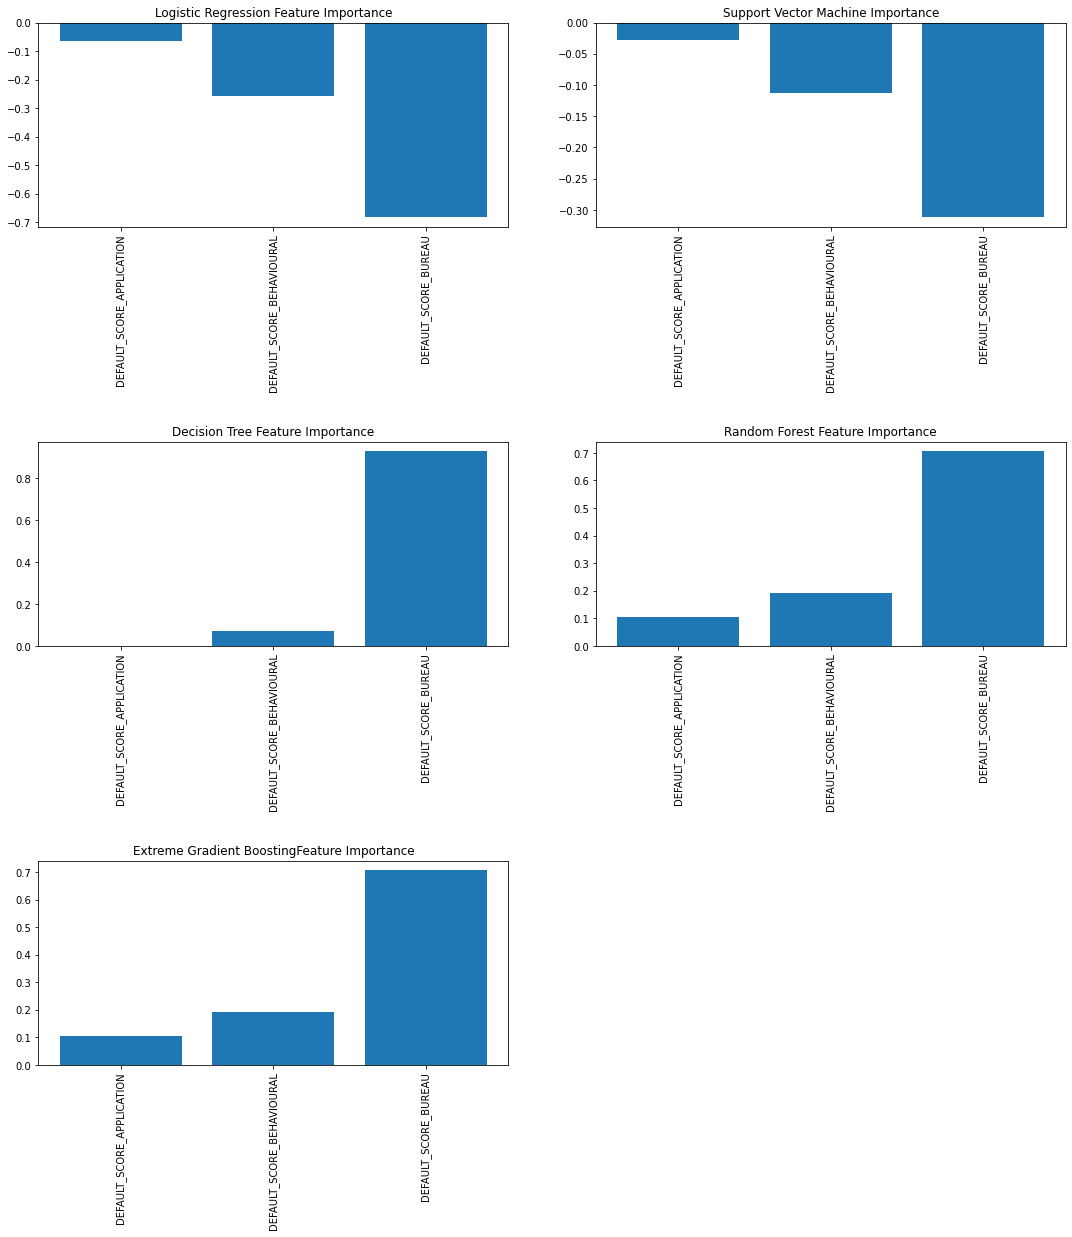

In [43]:
cols = list(X.columns)
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
importance_log_reg = log_reg.coef_[0]

for i,v in enumerate(importance_log_reg):
    print('Logistic - Regression Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(cols, importance_log_reg)
plt.xticks(rotation = 90)
plt.title("Logistic Regression Feature Importance")
plt.tight_layout(h_pad = 5, w_pad=5)

plt.subplot(3,2,2)
importance_svc = svc.coef_[0]
print(importance_svc)
for i,v in enumerate(importance_svc):
    print('SVM: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(cols, importance_svc)
plt.xticks(rotation = 90)
plt.title("Support Vector Machine Importance")
plt.tight_layout(h_pad = 5, w_pad=5)

plt.subplot(3,2,3)
# get importance
importance_decision_tree = decision_tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_decision_tree):
	print('Decision Tree-Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(cols, importance_decision_tree)
plt.xticks(rotation = 90)
plt.title("Decision Tree Feature Importance")

plt.subplot(3,2,4)
importance_RandomForest = RandomForest.feature_importances_
for i,v in enumerate(importance_RandomForest):
	print('Random Forest Feature: %0d, Score: %.5f' % (i,v))

plt.bar(cols, importance_RandomForest)
plt.xticks(rotation = 90)
plt.title("Random Forest Feature Importance")

plt.subplot(3,2,5)
importance_Xgboost = xgboost.feature_importances_
for i,v in enumerate(importance_Xgboost):
	print('Extreme Gradient Boosting: %0d, Score: %.5f' % (i,v))

plt.bar(cols, importance_RandomForest)
plt.xticks(rotation = 90)
plt.title("Extreme Gradient BoostingFeature Importance")
plt.xticks(rotation = 90) 
plt.show()




In [44]:
import lime #LIME package
import lime.lime_tabular #the type of LIIME analysis we’ll do
import shap #SHAP package

In [45]:
feature_names = X_train_SMOTE.columns

In [46]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_SMOTE.values, 
                                                   feature_names=feature_names, 
                                                   class_names=["Non Default", "Default"], 
                                                   verbose=True, mode='classification')

In [47]:
predict_fn_lg = lambda x: log_reg.predict_proba(x).astype(float)
predict_fn_svm = lambda x: svc._predict_proba_lr(x).astype(float)
predict_fn_dt = lambda x: decision_tree.predict_proba(x).astype(float)
predict_fn_rf = lambda x: RandomForest.predict_proba(x).astype(float)
predict_fn_xgboost = lambda x: xgboost.predict_proba(x).astype(float)

In [48]:
np.random.seed(1)
i = 19
exp_lg = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_lg, num_features=5)
exp_svm = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_svm, num_features=5)
exp_dt = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_dt, num_features=5)
exp_rf = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_rf, num_features=5)

exp_xgboost = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_xgboost, num_features=5)
#exp_lg.show_in_notebook(show_all=False)

Intercept 0.4604292612847224
Prediction_local [0.60858243]
Right: 0.5530241897477716
Intercept 0.48375055658306787
Prediction_local [0.55141679]
Right: 0.5247552368460292
Intercept 0.4779907358220752
Prediction_local [0.59514688]
Right: 0.40292892046646883
Intercept 0.4785534380465604
Prediction_local [0.56597585]
Right: 0.4419371517923686
Intercept 0.5446720319180656
Prediction_local [0.585885]
Right: 0.4199550151824951


In [49]:
exp_lg.show_in_notebook()

In [50]:
exp_svm.show_in_notebook()

In [51]:
exp_dt.show_in_notebook()

In [52]:
exp_rf.show_in_notebook()

In [53]:
exp_xgboost.show_in_notebook()
